# **Rising Star Pre-assignment**

## 1-Libraries

In [14]:
import datetime
from datetime import datetime
from datetime import timezone
import datetime as dt
import pandas as pd
import requests

## 2-Date input from user

In [4]:
#Date input from user
print("Please add 1 hour to the `to` input to make sure that you always get data for the end date as well.")

start_date = str(input('Enter a start date in YYYY-MM-DD-H-M (2021-12-27-14-41) format'))
end_date = str(input('Enter a end date in YYYY-MM-DD-H-M (2021-12-27-14-41) format'))

Please add 1 hour to the `to` input to make sure that you always get data for the end date as well.


Enter a start date in YYYY-MM-DD-H-M(2021-12-27-14-41) format 2018-01-19-00-00
Enter a end date in YYYY-MM-DD-H-M(2021-12-27-14-41) format 2018-05-19-01-00


## 2-Data preprocessing

In [44]:
def get_bitcoin_data_df(start_date, end_date):

    print( "the bitcoin data between {} and {} dates is being obtained".format(start_date,end_date))

    #Converting the entered date data to datetime format
    start_date_timestamp = datetime.strptime(start_date, "%Y-%m-%d-%H-%M")
    end_date_timestamp = datetime.strptime(end_date, "%Y-%m-%d-%H-%M")

    #Converting the entered date information to timestamp
    timestamp1 = start_date_timestamp.replace(tzinfo=timezone.utc).timestamp()
    timestamp2 = end_date_timestamp.replace(tzinfo=timezone.utc).timestamp()
    
    #Getting the needed data from CoinGecko’s public API 
    url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart/range?vs_currency=eur&from={}&to={}".format(timestamp1,timestamp2)
    req = requests.get(url=url)
    json=req.json()
    
    #Converting json data to dataframe
    df1 = pd.DataFrame(json['prices'],columns=["time","prices"])
    df2 = pd.DataFrame(json['market_caps'],columns=["time","market_caps"])
    df3 = pd.DataFrame(json['total_volumes'],columns=["time","total_volumes"])
    df=df1.merge(df2, how='left', on='time')
    df=df.merge(df3, how='left', on='time')
    
    #Converting timestamp information of time column to datetime format
    timestamp=df["time"].tolist()  
    time=[]
    for i in timestamp: 
        i=int(str(i)[:10])
        date = dt.datetime.utcfromtimestamp(i)
        time.append(date)
    df["time"]=time
    
    #Indexing the time column
    df.set_index('time', inplace=True)
    
    #Selecting data at 00:00 UTC from hourly data, when given a date range of 1 to 90 days
    df=df[(df.index.hour ==0 )]
    
    return df

df=get_bitcoin_data_df(start_date, end_date)
df.head()


the bitcoin data between 2018-01-19-00-00 and 2018-05-19-01-00 dates is being obtained


,prices,market_caps,total_volumes
time,,,
2018-01-19,9621.532150,1.617697e+11,3.443716e+09
2018-01-20,10850.402543,1.824552e+11,3.698950e+09
2018-01-21,9548.316146,1.605826e+11,3.524070e+09
2018-01-22,8968.207245,1.508449e+11,4.089840e+09
2018-01-23,8851.048916,1.488936e+11,3.883124e+09


## 3-Data visualization

array([<matplotlib.axes._subplots.AxesSubplot object at 0x115ed9cd0>,
      dtype=object)

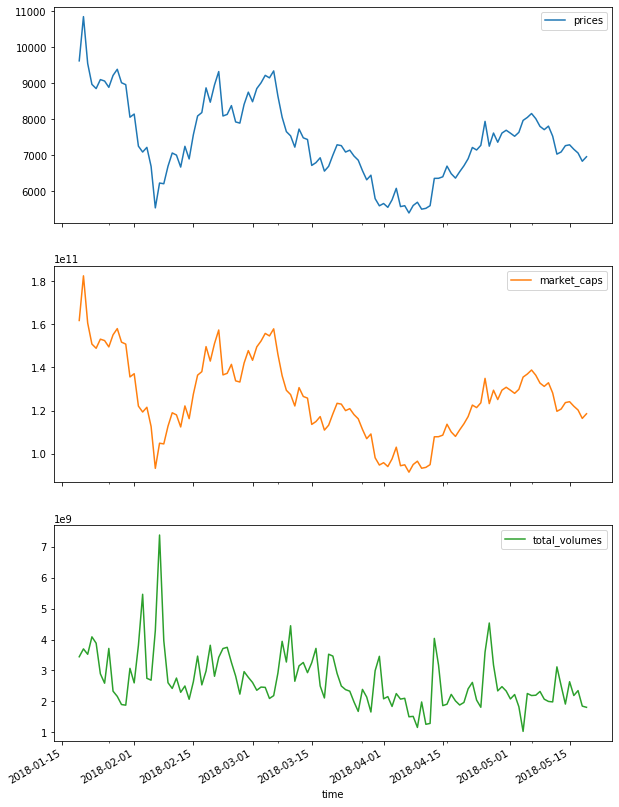

In [45]:
# Change of price, market caps and total volume data in the given time interval

visualization.plot(subplots=True, figsize=(10,15))

## A. How many days is the longest bearish (downward) trend within a given date range?

In [30]:
#A. How many days is the longest bearish (downward) trend within a given date range?

def show_downward_trend(df):
    
    prices=df["prices"].tolist()
    amount_of_days=0 
    trends=[]
    i=0
    while i+1<len(prices):
        if prices[i]>prices[i+1]:
            amount_of_days=amount_of_days+1
            trends.append(amount_of_days)
        else:            
            amount_of_days=0
        i=i+1
    
    print("inputs from {} and to {}, and the price decreased for {} days in a row ".format(start_date,end_date,max(trends)))
             
show_downward_trend(df)


inputs from 2018-01-19-00-00 and to 2018-05-19-01-00, and the price decreased for 5 days in a row 


## B. Which date within a given date range had the highest trading volume?

In [46]:
# Access to the maximum value of the total volumes variable and the date of this value

place_of_max= df["total_volumes"].idxmax()
maximum= df["total_volumes"].max()

print("in the date of {} the highest trading volume is {} euro".format(place_of_max,maximum))


in the date of 2018-02-07 00:00:00 the highest trading volume is 7390729402.163753 euro


## C. Scrooge has access to Gyro Gearloose’s newest invention, a time machine. Scrooge wants to use the time machine to profit from bitcoin. The application should be able to tell for a given date range, the best day for buying bitcoin, and the best day for selling the bought bitcoin to maximize profits. If the price only decreases in the date range, your output should indicate that one should not buy (nor sell) bitcoin on any of the days. You don't have to consider any side effects of time travel or how Scrooge's massive purchases would affect the price history.

In [47]:
def show_buy_sell(df):
    prices=df["prices"]
    prices=prices.tolist()
    list_of_profits=[]  
    
    # Finding the largest profit
    for i in range(0, len(prices)-1):
        for j in range(0, len(prices)-1):
            profit= prices[len(prices)-1-j]-prices[i]
            list_of_profits.extend([[profit,len(prices)-1-j, i]])     # Assigning indexes to the list with profit
            list_of_profits_df=pd.DataFrame(list_of_profits,columns=["profit","sell", "buy"])  #Converting the list with profit and index information into list_of_profits dataframe

    list_of_profits_final=list_of_profits_df.iloc[list_of_profits_df["profit"].idxmax()]  #identifying the row with the largest profit

    final=df["prices"].reset_index()   # Converting dates from index to variables
    if list_of_profits_final["profit"]<=0:    
        print("no profit")     # The situation of no profit between the dates of continuous decline in bitcoin
    else:
        # Accessing the date information using the index information on the largest profitable line
        print("buy time : {} , sell time : {}".format(final["time"][list_of_profits_final["buy"]],final["time"][list_of_profits_final["sell"]]))

show_buy_sell(df)


buy time : 2018-04-07 00:00:00 , sell time : 2018-01-20 00:00:00
